In [ ]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [ ]:
train_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/FinalProject/data/전처리완료_데이터/chargeInfo_train_2.csv")
test_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/FinalProject/data/전처리완료_데이터/chargeInfo_test_2.csv")
train_df

,기준년월,ID,청구금액_B0,청구금액_R3M,청구금액_R6M,포인트_마일리지_건별_B0M,포인트_마일리지_건별_R3M,포인트_포인트_건별_B0M,포인트_포인트_건별_R3M,포인트_마일리지_월적립_B0M,...,상환개월수_결제일_R6M,상환개월수_결제일_R3M,선결제건수_R6M,선결제건수_R3M,연체건수_R6M,연체건수_R3M,혜택수혜금액_R3M,포인트_마일리지_환산_B0M,혜택수혜금액,Segment
0,201807,TRAIN_000000,12226,46588,88693,0,0,1444,1827,0,...,5,3,0,0,1,0,3,0,0,D
1,201807,TRAIN_000001,5834,10530,16861,0,0,0,0,0,...,6,3,0,0,0,0,0,0,0,E
2,201807,TRAIN_000002,21866,85931,165221,0,0,2305,5153,0,...,6,3,0,0,0,0,121,0,50,C
3,201807,TRAIN_000003,16356,61518,127371,0,0,1452,2523,0,...,5,3,2,0,0,0,3,0,2,D
4,201807,TRAIN_000004,0,0,155,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2399995,201812,TRAIN_399995,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,E
2399996,201812,TRAIN_399996,14402,37515,99849,0,0,3339,10890,0,...,6,3,0,0,0,0,164,0,53,D
2399997,201812,TRAIN_399997,5731,22274,41073,0,0,0,0,0,...,6,3,0,0,0,0,0,0,0,C
2399998,201812,TRAIN_399998,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,E


In [ ]:
df1 = train_df.drop(['ID'], axis=1)
df1
# df2 = test_df.drop(['Unnamed: 0'], axis=1)

,기준년월,청구금액_B0,청구금액_R3M,청구금액_R6M,포인트_마일리지_건별_B0M,포인트_마일리지_건별_R3M,포인트_포인트_건별_B0M,포인트_포인트_건별_R3M,포인트_마일리지_월적립_B0M,포인트_마일리지_월적립_R3M,...,상환개월수_결제일_R6M,상환개월수_결제일_R3M,선결제건수_R6M,선결제건수_R3M,연체건수_R6M,연체건수_R3M,혜택수혜금액_R3M,포인트_마일리지_환산_B0M,혜택수혜금액,Segment
0,201807,12226,46588,88693,0,0,1444,1827,0,0,...,5,3,0,0,1,0,3,0,0,D
1,201807,5834,10530,16861,0,0,0,0,0,0,...,6,3,0,0,0,0,0,0,0,E
2,201807,21866,85931,165221,0,0,2305,5153,0,0,...,6,3,0,0,0,0,121,0,50,C
3,201807,16356,61518,127371,0,0,1452,2523,0,0,...,5,3,2,0,0,0,3,0,2,D
4,201807,0,0,155,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2399995,201812,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,E
2399996,201812,14402,37515,99849,0,0,3339,10890,0,0,...,6,3,0,0,0,0,164,0,53,D
2399997,201812,5731,22274,41073,0,0,0,0,0,0,...,6,3,0,0,0,0,0,0,0,C
2399998,201812,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,E


In [ ]:
# ▶ 1. 데이터 나누기
X = df1.drop("Segment", axis=1)
y = df1["Segment"]

# ▶ 2. 레이블 인코딩
le = LabelEncoder()
y_encoded = le.fit_transform(y)  # 예: ['A', 'B', 'C'] → [0, 1, 2]

# ▶ 3. 학습용 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# ▶ 4. 모델 학습
model = xgb.XGBClassifier(tree_method='hist', device='cuda', n_estimators=1000, random_state=42)
model.fit(X_train, y_train)

# ▶ 5. 중요도 보기
importances = model.feature_importances_

importance_df = pd.DataFrame({
    "Feature": X.columns,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

print(importance_df.head(20))

            Feature  Importance
3          청구금액_R6M    0.352401
22         할인건수_R3M    0.082918
12   포인트_적립포인트_R12M    0.047216
30        선결제건수_R6M    0.030552
14   포인트_이용포인트_R12M    0.026823
7    포인트_포인트_건별_R3M    0.023799
2          청구금액_R3M    0.023674
27     할인금액_청구서_B0M    0.023631
13    포인트_적립포인트_R3M    0.023489
1           청구금액_B0    0.021907
36           혜택수혜금액    0.021115
25         할인금액_B0M    0.021016
26     할인금액_청구서_R3M    0.020592
32         연체건수_R6M    0.019715
18     마일_적립포인트_R3M    0.018986
24         할인건수_B0M    0.017882
35  포인트_마일리지_환산_B0M    0.016846
28    상환개월수_결제일_R6M    0.016624
15    포인트_이용포인트_R3M    0.015539
29    상환개월수_결제일_R3M    0.014320


In [ ]:
print(importance_df)

             Feature  Importance
3           청구금액_R6M    0.487806
22          할인건수_R3M    0.057659
12    포인트_적립포인트_R12M    0.045738
2           청구금액_R3M    0.026465
1            청구금액_B0    0.025014
18      마일_적립포인트_R3M    0.024862
14    포인트_이용포인트_R12M    0.024525
7     포인트_포인트_건별_R3M    0.023467
27      할인금액_청구서_B0M    0.022427
36            혜택수혜금액    0.020486
35   포인트_마일리지_환산_B0M    0.020361
30         선결제건수_R6M    0.020085
25          할인금액_B0M    0.018157
26      할인금액_청구서_R3M    0.017098
13     포인트_적립포인트_R3M    0.016590
32          연체건수_R6M    0.013293
17     마일_적립포인트_R12M    0.012328
28     상환개월수_결제일_R6M    0.011076
24          할인건수_B0M    0.010991
29     상환개월수_결제일_R3M    0.010661
34        혜택수혜금액_R3M    0.010212
15     포인트_이용포인트_R3M    0.008932
21      마일_잔여포인트_B0M    0.008742
33          연체건수_R3M    0.008591
23          할인금액_R3M    0.007341
31         선결제건수_R3M    0.006193
9   포인트_마일리지_월적립_R3M    0.006100
0               기준년월    0.005451
10   포인트_포인트_월적립_B0M    0.004765
6     포인트_

In [ ]:
threshold = 0.01
selected_features = importance_df[importance_df['Importance'] > threshold]['Feature'].tolist()
selected_features

['청구금액_R6M',
 '할인건수_R3M',
 '포인트_적립포인트_R12M',
 '선결제건수_R6M',
 '포인트_이용포인트_R12M',
 '포인트_포인트_건별_R3M',
 '청구금액_R3M',
 '할인금액_청구서_B0M',
 '포인트_적립포인트_R3M',
 '청구금액_B0',
 '혜택수혜금액',
 '할인금액_B0M',
 '할인금액_청구서_R3M',
 '연체건수_R6M',
 '마일_적립포인트_R3M',
 '할인건수_B0M',
 '포인트_마일리지_환산_B0M',
 '상환개월수_결제일_R6M',
 '포인트_이용포인트_R3M',
 '상환개월수_결제일_R3M',
 '연체건수_R3M',
 '마일_적립포인트_R12M',
 '혜택수혜금액_R3M',
 '선결제건수_R3M',
 '할인금액_R3M',
 '마일_잔여포인트_B0M',
 '포인트_포인트_월적립_R3M']

In [ ]:
importance_df = importance_df.sort_values('Importance', ascending=False).reset_index(drop=True)
importance_df['Cumulative'] = importance_df['Importance'].cumsum()
selected_features = importance_df[importance_df['Cumulative'] <= 0.90]['Feature'].tolist()
selected_features

['청구금액_R6M',
 '할인건수_R3M',
 '포인트_적립포인트_R12M',
 '청구금액_R3M',
 '청구금액_B0',
 '마일_적립포인트_R3M',
 '포인트_이용포인트_R12M',
 '포인트_포인트_건별_R3M',
 '할인금액_청구서_B0M',
 '혜택수혜금액',
 '포인트_마일리지_환산_B0M',
 '선결제건수_R6M',
 '할인금액_B0M',
 '할인금액_청구서_R3M',
 '포인트_적립포인트_R3M',
 '연체건수_R6M',
 '마일_적립포인트_R12M',
 '상환개월수_결제일_R6M',
 '할인건수_B0M']

In [ ]:
X

['청구금액_R6M',
 '할인건수_R3M',
 '포인트_적립포인트_R12M',
 '청구금액_R3M',
 '청구금액_B0',
 '마일_적립포인트_R3M',
 '포인트_이용포인트_R12M',
 '포인트_포인트_건별_R3M',
 '할인금액_청구서_B0M',
 '혜택수혜금액',
 '포인트_마일리지_환산_B0M',
 '선결제건수_R6M',
 '할인금액_B0M',
 '할인금액_청구서_R3M',
 '포인트_적립포인트_R3M',
 '연체건수_R6M',
 '마일_적립포인트_R12M',
 '상환개월수_결제일_R6M',
 '할인건수_B0M']

In [ ]:
!pip install catboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 24.6 MB/s eta 0:00:00


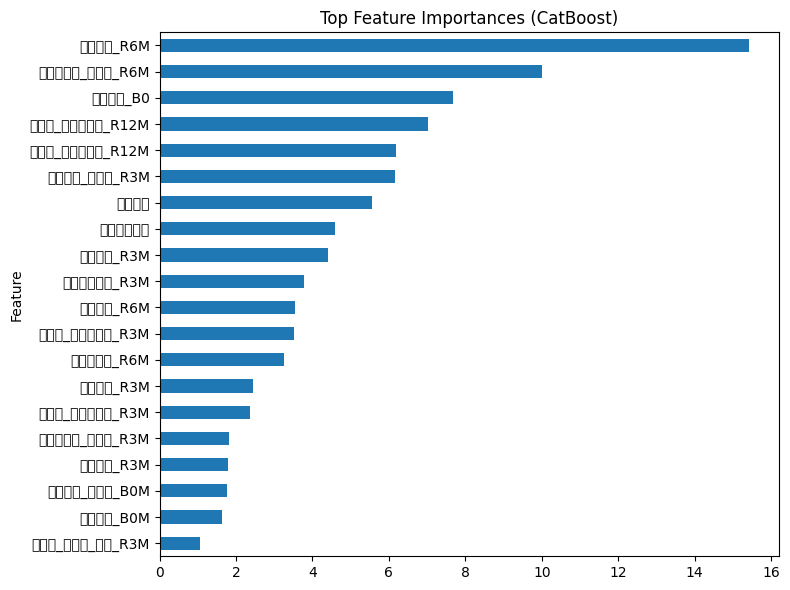

             Feature  Importance
3           청구금액_R6M   15.427420
28     상환개월수_결제일_R6M    9.997601
1            청구금액_B0    7.685995
12    포인트_적립포인트_R12M    7.012922
14    포인트_이용포인트_R12M    6.174261
26      할인금액_청구서_R3M    6.160035
0               기준년월    5.569494
36            혜택수혜금액    4.581412
2           청구금액_R3M    4.405407
34        혜택수혜금액_R3M    3.770191
32          연체건수_R6M    3.545463
15     포인트_이용포인트_R3M    3.516361
30         선결제건수_R6M    3.263607
23          할인금액_R3M    2.447202
13     포인트_적립포인트_R3M    2.376179
29     상환개월수_결제일_R3M    1.822533
22          할인건수_R3M    1.790154
27      할인금액_청구서_B0M    1.763741
25          할인금액_B0M    1.640549
7     포인트_포인트_건별_R3M    1.068523
33          연체건수_R3M    1.025589
6     포인트_포인트_건별_B0M    0.873991
35   포인트_마일리지_환산_B0M    0.873516
17     마일_적립포인트_R12M    0.574046
31         선결제건수_R3M    0.538956
18      마일_적립포인트_R3M    0.414110
21      마일_잔여포인트_B0M    0.400347
11   포인트_포인트_월적립_R3M    0.374514
10   포인트_포인트_월적립_B0M    0.196421
9   포인트_마일

In [ ]:
import catboost
from catboost import CatBoostClassifier, Pool
import pandas as pd
import matplotlib.pyplot as plt

# 1. 입력 및 타깃 데이터 설정
X = df1.drop(columns=['Segment'])  # 특성
y = df1['Segment']                 # 타깃 (분류 label)

# 2. 결측치는 CatBoost가 자체 처리 가능 (따로 인코딩하지 않아도 됨)
# label encoding은 문자형만 해도 됨 (자동 처리됨)

# 3. CatBoostClassifier 모델 생성 및 학습
model = CatBoostClassifier(task_type='GPU', devices='0', verbose=0, random_state=42)
model.fit(X, y)

# 4. 중요도 추출
importances = model.get_feature_importance()
feature_names = X.columns

# 5. 중요도 데이터프레임 정리
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# 6. 상위 N개 시각화
top_n = 20
importance_df.head(top_n).plot(kind='barh', x='Feature', y='Importance', figsize=(8, 6), legend=False)
plt.title('Top Feature Importances (CatBoost)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# 7. 데이터프레임으로 결과 보기
print(importance_df.head(30))  # 중요도 상위 30개


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant


# 2. X 데이터셋 생성
X = train_df[selected_features].copy()
X = add_constant(X)  # VIF 계산에 상수항 포함

# 3. VIF 계산
vif_df = pd.DataFrame()
vif_df["Feature"] = X.columns
vif_df["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# 4. VIF 결과 정렬 출력
vif_df.sort_values(by="VIF", ascending=False)


,Feature,VIF
15,마일_적립포인트_R3M,25.621709
25,할인금액_R3M,20.830107
17,포인트_마일리지_환산_B0M,19.934603
7,청구금액_R3M,19.855808
12,할인금액_B0M,18.165514
19,포인트_이용포인트_R3M,15.843713
13,할인금액_청구서_R3M,15.806182
8,할인금액_청구서_B0M,14.867365
11,혜택수혜금액,14.081640
23,혜택수혜금액_R3M,14.063306


In [ ]:
check = ['기준년월', 'ID', 'Segment', '청구금액_R6M',
 '할인건수_R3M',
 '포인트_적립포인트_R12M',
 '선결제건수_R6M',
 '포인트_이용포인트_R12M',
 '포인트_포인트_건별_R3M',
 '청구금액_R3M',
 '할인금액_청구서_B0M',
 '포인트_적립포인트_R3M',
 '청구금액_B0',
 '혜택수혜금액',
 '할인금액_B0M',
 '할인금액_청구서_R3M',
 '연체건수_R6M',
 '마일_적립포인트_R3M',
 '할인건수_B0M',
 '포인트_마일리지_환산_B0M',
 '상환개월수_결제일_R6M',
 '포인트_이용포인트_R3M',
 '상환개월수_결제일_R3M',
 '연체건수_R3M',
 '마일_적립포인트_R12M',
 '혜택수혜금액_R3M',
 '선결제건수_R3M',
 '할인금액_R3M',
 '마일_잔여포인트_B0M',
 '포인트_포인트_월적립_R3M']

check_test = ['기준년월', 'ID', '청구금액_R6M',
 '할인건수_R3M',
 '포인트_적립포인트_R12M',
 '선결제건수_R6M',
 '포인트_이용포인트_R12M',
 '포인트_포인트_건별_R3M',
 '청구금액_R3M',
 '할인금액_청구서_B0M',
 '포인트_적립포인트_R3M',
 '청구금액_B0',
 '혜택수혜금액',
 '할인금액_B0M',
 '할인금액_청구서_R3M',
 '연체건수_R6M',
 '마일_적립포인트_R3M',
 '할인건수_B0M',
 '포인트_마일리지_환산_B0M',
 '상환개월수_결제일_R6M',
 '포인트_이용포인트_R3M',
 '상환개월수_결제일_R3M',
 '연체건수_R3M',
 '마일_적립포인트_R12M',
 '혜택수혜금액_R3M',
 '선결제건수_R3M',
 '할인금액_R3M',
 '마일_잔여포인트_B0M',
 '포인트_포인트_월적립_R3M']


filterd_df =  train_df[check]
filterd_test_df =  test_df[check_test]
display(filterd_df)
display(filterd_test_df)

,기준년월,ID,Segment,청구금액_R6M,할인건수_R3M,포인트_적립포인트_R12M,선결제건수_R6M,포인트_이용포인트_R12M,포인트_포인트_건별_R3M,청구금액_R3M,...,상환개월수_결제일_R6M,포인트_이용포인트_R3M,상환개월수_결제일_R3M,연체건수_R3M,마일_적립포인트_R12M,혜택수혜금액_R3M,선결제건수_R3M,할인금액_R3M,마일_잔여포인트_B0M,포인트_포인트_월적립_R3M
0,201807,TRAIN_000000,D,88693,0,3460,0,4008,1827,46588,...,5,1296,3,0,0,3,0,0,0,0
1,201807,TRAIN_000001,E,16861,0,0,0,0,0,10530,...,6,0,3,0,0,0,0,0,0,0
2,201807,TRAIN_000002,C,165221,0,17135,0,8312,5153,85931,...,6,2765,3,0,0,121,0,0,0,0
3,201807,TRAIN_000003,D,127371,0,6464,2,8815,2523,61518,...,5,2467,3,0,0,3,0,0,0,0
4,201807,TRAIN_000004,E,155,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2399995,201812,TRAIN_399995,E,0,0,2379,0,6971,0,0,...,0,2049,0,0,0,0,0,0,0,0
2399996,201812,TRAIN_399996,D,99849,0,64696,0,59260,10890,37515,...,6,13202,3,0,0,164,0,0,0,0
2399997,201812,TRAIN_399997,C,41073,0,0,0,0,0,22274,...,6,0,3,0,0,0,0,0,0,0
2399998,201812,TRAIN_399998,E,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


,기준년월,ID,청구금액_R6M,할인건수_R3M,포인트_적립포인트_R12M,선결제건수_R6M,포인트_이용포인트_R12M,포인트_포인트_건별_R3M,청구금액_R3M,할인금액_청구서_B0M,...,상환개월수_결제일_R6M,포인트_이용포인트_R3M,상환개월수_결제일_R3M,연체건수_R3M,마일_적립포인트_R12M,혜택수혜금액_R3M,선결제건수_R3M,할인금액_R3M,마일_잔여포인트_B0M,포인트_포인트_월적립_R3M
0,201807,TEST_00000,22151,0,0,0,0,0,11441,0,...,5,0,2,0,8978,143,0,0,0,0
1,201807,TEST_00001,32878,0,0,0,0,0,20522,14,...,6,0,3,0,0,0,0,0,0,0
2,201807,TEST_00002,71867,0,0,0,29366,0,50508,50,...,6,5945,3,0,0,148,0,149,0,6032
3,201807,TEST_00003,4986,0,2875,0,2675,1319,4604,0,...,2,1059,1,2,0,3,0,0,0,0
4,201807,TEST_00004,10758,0,0,0,0,0,6788,0,...,6,0,3,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599995,201812,TEST_99995,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
599996,201812,TEST_99996,2237,0,0,3,3075,0,1256,50,...,5,0,3,0,0,149,2,150,0,0
599997,201812,TEST_99997,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
599998,201812,TEST_99998,108420,0,5431,7,8485,0,48141,242,...,1,3804,1,0,0,0,3,0,0,0


In [ ]:
combined_df = pd.concat([filterd_df, filterd_test_df], axis=0, ignore_index=True)
combined_df

,기준년월,ID,Segment,청구금액_R6M,할인건수_R3M,포인트_적립포인트_R12M,선결제건수_R6M,포인트_이용포인트_R12M,포인트_포인트_건별_R3M,청구금액_R3M,...,상환개월수_결제일_R6M,포인트_이용포인트_R3M,상환개월수_결제일_R3M,연체건수_R3M,마일_적립포인트_R12M,혜택수혜금액_R3M,선결제건수_R3M,할인금액_R3M,마일_잔여포인트_B0M,포인트_포인트_월적립_R3M
0,201807,TRAIN_000000,D,88693,0,3460,0,4008,1827,46588,...,5,1296,3,0,0,3,0,0,0,0
1,201807,TRAIN_000001,E,16861,0,0,0,0,0,10530,...,6,0,3,0,0,0,0,0,0,0
2,201807,TRAIN_000002,C,165221,0,17135,0,8312,5153,85931,...,6,2765,3,0,0,121,0,0,0,0
3,201807,TRAIN_000003,D,127371,0,6464,2,8815,2523,61518,...,5,2467,3,0,0,3,0,0,0,0
4,201807,TRAIN_000004,E,155,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2999995,201812,TEST_99995,NaN,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2999996,201812,TEST_99996,NaN,2237,0,0,3,3075,0,1256,...,5,0,3,0,0,149,2,150,0,0
2999997,201812,TEST_99997,NaN,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2999998,201812,TEST_99998,NaN,108420,0,5431,7,8485,0,48141,...,1,3804,1,0,0,0,3,0,0,0


In [ ]:
# combined_df.to_csv('/content/drive/MyDrive/Colab Notebooks/FinalProject/data/피처선택완료_데이터/combined_data_2.csv', index=False, encoding='utf-8-sig')

In [ ]:
# ▶ 1. 파일 불러오기
df1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/FinalProject/data/피처선택완료_데이터/combined_data_1.csv')
df2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/FinalProject/data/피처선택완료_데이터/combined_data_2.csv')

# ▶ 2. 데이터 결합
merged_df = pd.merge(df1, df2.drop(columns=['Segment'], errors='ignore'), on=['ID', '기준년월'], how='inner')
merged_df = merged_df[merged_df['기준년월'] == 201812] # 12월 데이터만 할 경우!
merged_df = merged_df.drop(columns=['기준년월'])
merged_df

# ▶ 3. CSV로 저장
merged_df.to_csv('/content/drive/MyDrive/Colab Notebooks/FinalProject/data/최종데이터/charge_balance_201812.csv', index=False, encoding='utf-8-sig')


/tmp/ipython-input-10-82298382.py:2: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/FinalProject/data/피처선택완료_데이터/combined_data_1.csv')
/tmp/ipython-input-10-82298382.py:3: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/FinalProject/data/피처선택완료_데이터/combined_data_2.csv')


In [ ]:
merged_df1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/FinalProject/data/최종데이터/charge_balance_201812.csv')
merged_df1

/tmp/ipython-input-11-2225629878.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  merged_df1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/FinalProject/data/최종데이터/charge_balance_201812.csv')


,ID,Segment,월중평잔_일시불_B0M,평잔_6M,평잔_CA_6M,잔액_리볼빙일시불이월_B0M,RV_최대잔액_R3M,평잔_일시불_해외_6M,월중평잔_일시불,RV_평균잔액_R3M,...,상환개월수_결제일_R6M,포인트_이용포인트_R3M,상환개월수_결제일_R3M,연체건수_R3M,마일_적립포인트_R12M,혜택수혜금액_R3M,선결제건수_R3M,할인금액_R3M,마일_잔여포인트_B0M,포인트_포인트_월적립_R3M
0,TRAIN_000000,D,850,25755,20837,0,0,0,1035,0,...,6,916,3,0,0,0,0,0,0,0
1,TRAIN_000001,E,2222,6168,0,0,0,0,2399,0,...,6,0,3,0,0,0,0,0,0,0
2,TRAIN_000002,C,10580,84397,59197,5380,6104,0,8091,3149,...,6,2477,3,0,0,109,0,0,0,0
3,TRAIN_000003,D,689,52311,17488,0,0,0,1149,0,...,6,3664,3,0,0,96,0,0,0,0
4,TRAIN_000004,E,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,TEST_99995,NaN,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
499996,TEST_99996,NaN,260,275,0,0,0,0,256,0,...,5,0,3,0,0,149,2,150,0,0
499997,TEST_99997,NaN,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
499998,TEST_99998,NaN,16911,20549,0,0,0,240,14005,0,...,1,3804,1,0,0,0,3,0,0,0
